<a class="anchor" id="link"></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1---Загрузка-данных" data-toc-modified-id="Шаг-1---Загрузка-данных-1">Шаг 1 - Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-шагу-&quot;Загрузка-данных&quot;" data-toc-modified-id="Вывод-по-шагу-&quot;Загрузка-данных&quot;-1.1">Вывод по шагу "Загрузка данных"</a></span></li></ul></li><li><span><a href="#Шаг-2---Подготовка-данных" data-toc-modified-id="Шаг-2---Подготовка-данных-2">Шаг 2 - Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#2.1-Обработка-текстов-комментариев" data-toc-modified-id="2.1-Обработка-текстов-комментариев-2.1">2.1 Обработка текстов комментариев</a></span></li><li><span><a href="#2.2-Деление-данных-на-выборки" data-toc-modified-id="2.2-Деление-данных-на-выборки-2.2">2.2 Деление данных на выборки</a></span></li><li><span><a href="#2.3-TF-IDF" data-toc-modified-id="2.3-TF-IDF-2.3">2.3 TF-IDF</a></span></li><li><span><a href="#Вывод-по-шагу-&quot;Подготовка-данных&quot;" data-toc-modified-id="Вывод-по-шагу-&quot;Подготовка-данных&quot;-2.4">Вывод по шагу "Подготовка данных"</a></span></li></ul></li><li><span><a href="#Шаг-3---Обучение-моделей" data-toc-modified-id="Шаг-3---Обучение-моделей-3">Шаг 3 - Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#3.1-Логистическая-регрессия-/-Logistic-Regression" data-toc-modified-id="3.1-Логистическая-регрессия-/-Logistic-Regression-3.1">3.1 Логистическая регрессия / Logistic Regression</a></span></li><li><span><a href="#3.2-Дерево-решений/-Decision-Tree-Classifier" data-toc-modified-id="3.2-Дерево-решений/-Decision-Tree-Classifier-3.2">3.2 Дерево решений/ Decision Tree Classifier</a></span></li><li><span><a href="#3.3-Градиентный-бустинг-/-Cat-Boost-Classifier" data-toc-modified-id="3.3-Градиентный-бустинг-/-Cat-Boost-Classifier-3.3">3.3 Градиентный бустинг / Cat Boost Classifier</a></span></li><li><span><a href="#Вывод-по-шагу-&quot;Обучение-моделей&quot;" data-toc-modified-id="Вывод-по-шагу-&quot;Обучение-моделей&quot;-3.4">Вывод по шагу "Обучение моделей"</a></span></li></ul></li><li><span><a href="#Шаг-4---Тестирование-лучшей-модели" data-toc-modified-id="Шаг-4---Тестирование-лучшей-модели-4">Шаг 4 - Тестирование лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-шагу-&quot;Тестирование-лучшей-модели&quot;" data-toc-modified-id="Вывод-по-шагу-&quot;Тестирование-лучшей-модели&quot;-4.1">Вывод по шагу "Тестирование лучшей модели"</a></span></li></ul></li><li><span><a href="#Шаг-5---Общий-вывод" data-toc-modified-id="Шаг-5---Общий-вывод-5">Шаг 5 - Общий вывод</a></span></li></ul></div>

# Обучение модели классификации комментариев

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Необходимо обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

Значение метрики качества *F1* должно быть не меньше 0.75. 



**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Шаг 1 - Загрузка данных
[Вернуться к содержанию](#link)

Загрузим и изучим данные.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score,  roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier

import time
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings(action='ignore')

RANDOM_STATE = 42

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Елена\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Елена\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Елена\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Елена\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# сделаем настройку

# снимем ограничение на количество столбцов
pd.set_option('display.max_columns', 50)

# снимем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', 120)

# игнорируем предупреждения
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# выставим ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# устанавим стиль графиков
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})   
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')

In [3]:
# загрузим данные и сохраним их в переменную
try:
    data = pd.read_csv('toxic_comments.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [4]:
# посмотрим на первые строки таблицы
data.head()

,Unnamed: 0,text,toxic
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, jus...",0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and ...",0
3,3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on,...",0
4,4,"You, sir, are my hero. Any chance you remember what page that's on?",0


In [5]:
# изучим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [6]:
# посмотрим на размер таблицы
data.shape

(159292, 3)

In [7]:
# определим количество пропусков в каждом столбце
data.isna().sum()

Unnamed: 0    0
text          0
toxic         0
dtype: int64

In [8]:
# проверим наличие дубликатов
data.duplicated().sum() 

0

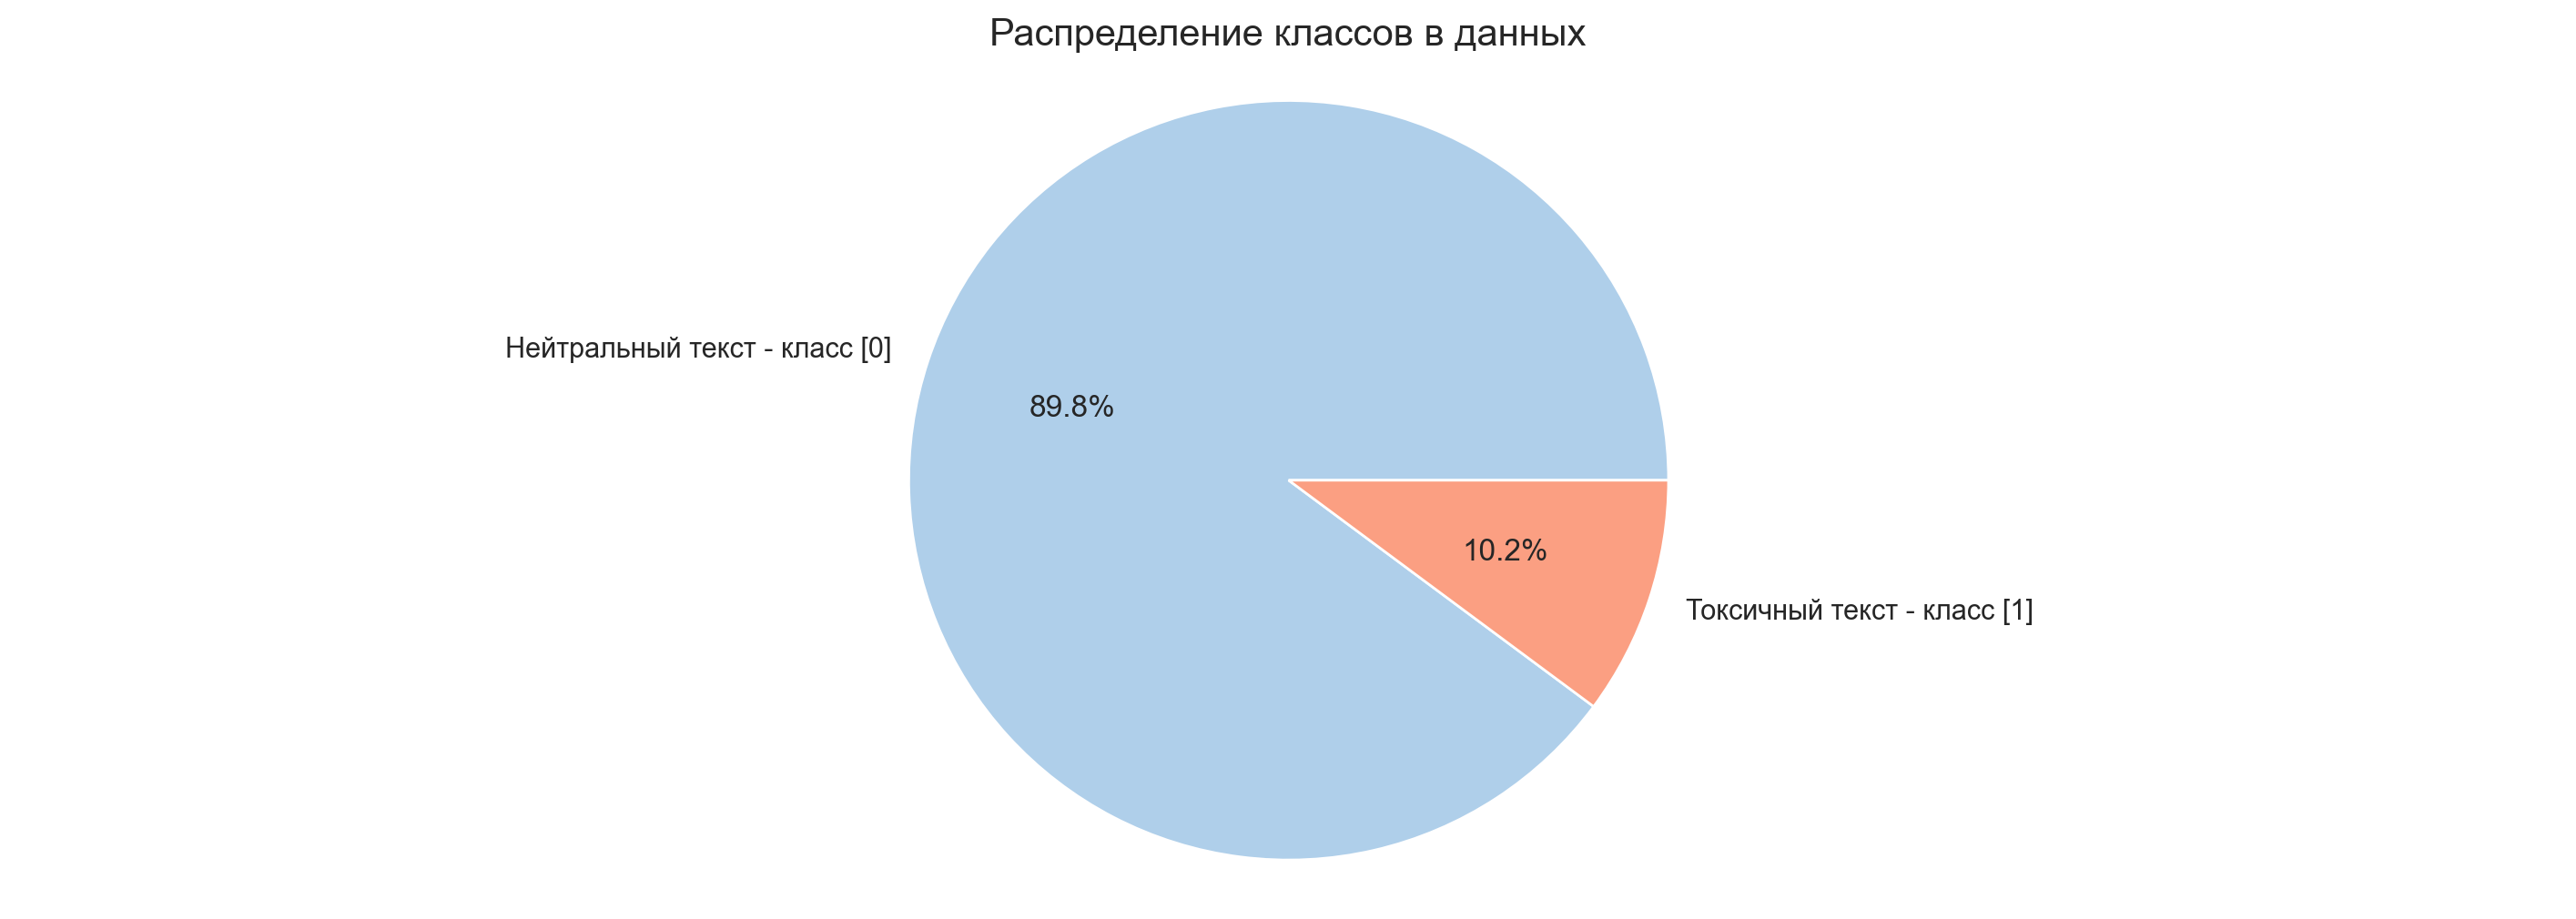

In [9]:
# посмотрим на баланс классов в целевом признаке
toxic_counts = data['toxic'].value_counts(normalize=True)
plt.figure(figsize=(18, 6))
plt.pie(
    toxic_counts, 
    labels=['Нейтральный текст - класс [0]','Токсичный текст - класс [1]'], 
    autopct='%1.1f%%', 
    colors = ['#AFCFEA', '#FB9F82'])
plt.title('Распределение классов в данных', fontsize=15)
plt.axis('equal')
plt.show()

### Вывод по шагу "Загрузка данных"

1. Файл содержит данные по 159292 комментариям. В данных отсутствуют пропуски и дубликаты. Необходимо удалить признак "Unnamed", так как он фактически дублирует индексы.


2. Тексты комментариев на английском языке и содержат лишние знаки и символы. Их необходимо обработать на следующем этапе.


3. В целевом признаке 90% объектов относятся к классу `0`, перед обучением моделей классы требуется сбалансировать.

## Шаг 2 - Подготовка данных
[Вернуться к содержанию](#link)

Подготовим данные:
- удалим лишний признак,
- обработаем тексты комментариев от лишних символов,
- разделим данные на обучающую и тестовую выборки,
- применим TF-IDF к данным.

In [10]:
# удалим лишний признак из данных
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, jus...",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and ...",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on,...",0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


### 2.1 Обработка текстов комментариев

Очистим тексты комментариев от ненужных знаков, сделаем лемматизацию, уберем стоп-слова.

In [11]:
# напишем функцию для очистки текста от ненужных знаков и стоп-слов
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [12]:
# применим функцию к данным:
data['text'] = data['text'].apply(clean_text)
data.head()

,text,toxic
0,explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac plea...,0
1,aww matches background colour seemingly stuck thanks talk january utc,0
2,hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems ca...,0
3,make real suggestions improvement wondered section statistics later subsection types accidents think references may ...,0
4,sir hero chance remember page,0


In [13]:
# напишем функцию для лемматизации текстов
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def lemmatize_text(text):
    words = word_tokenize(text.lower())
    tagged = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [14]:
# леммализируем тексты постов
data['text'] = data['text'].apply(lemmatize_text)
data.head()

,text,toxic
0,explanation edits make username hardcore metallica fan revert vandalisms closure gas vote new york doll fac please r...,0
1,aww match background colour seemingly stuck thanks talk january utc,0
2,hey man really try edit war guy constantly remove relevant information talk edits instead talk page seem care format...,0
3,make real suggestion improvement wonder section statistic later subsection type accident think reference may need ti...,0
4,sir hero chance remember page,0


**Вывод:**

- Тексты комментариев очищены от ненужных знаков, убраны стоп-слова, проведена лемматизация.

### 2.2 Деление данных на выборки

Разделим данные на обучающую и тестовую выборку в отношении 3:1.

In [15]:
# разделим целевые значения и признаки
features = data.drop('toxic',axis=1)
target = data['toxic']

In [16]:
# разделим данные на выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    random_state=RANDOM_STATE, 
    shuffle=True,
    stratify=target)
    
print('Размер обучающей выборки:', features_train.shape)
print('Размер тестовой выборки:', features_test.shape)
print('Размер целевого признака для обучающей выборки:', target_train.shape)
print('Размер целевого признака для тестовой выборки:', target_test.shape)

Размер обучающей выборки: (119469, 1)
Размер тестовой выборки: (39823, 1)
Размер целевого признака для обучающей выборки: (119469,)
Размер целевого признака для тестовой выборки: (39823,)


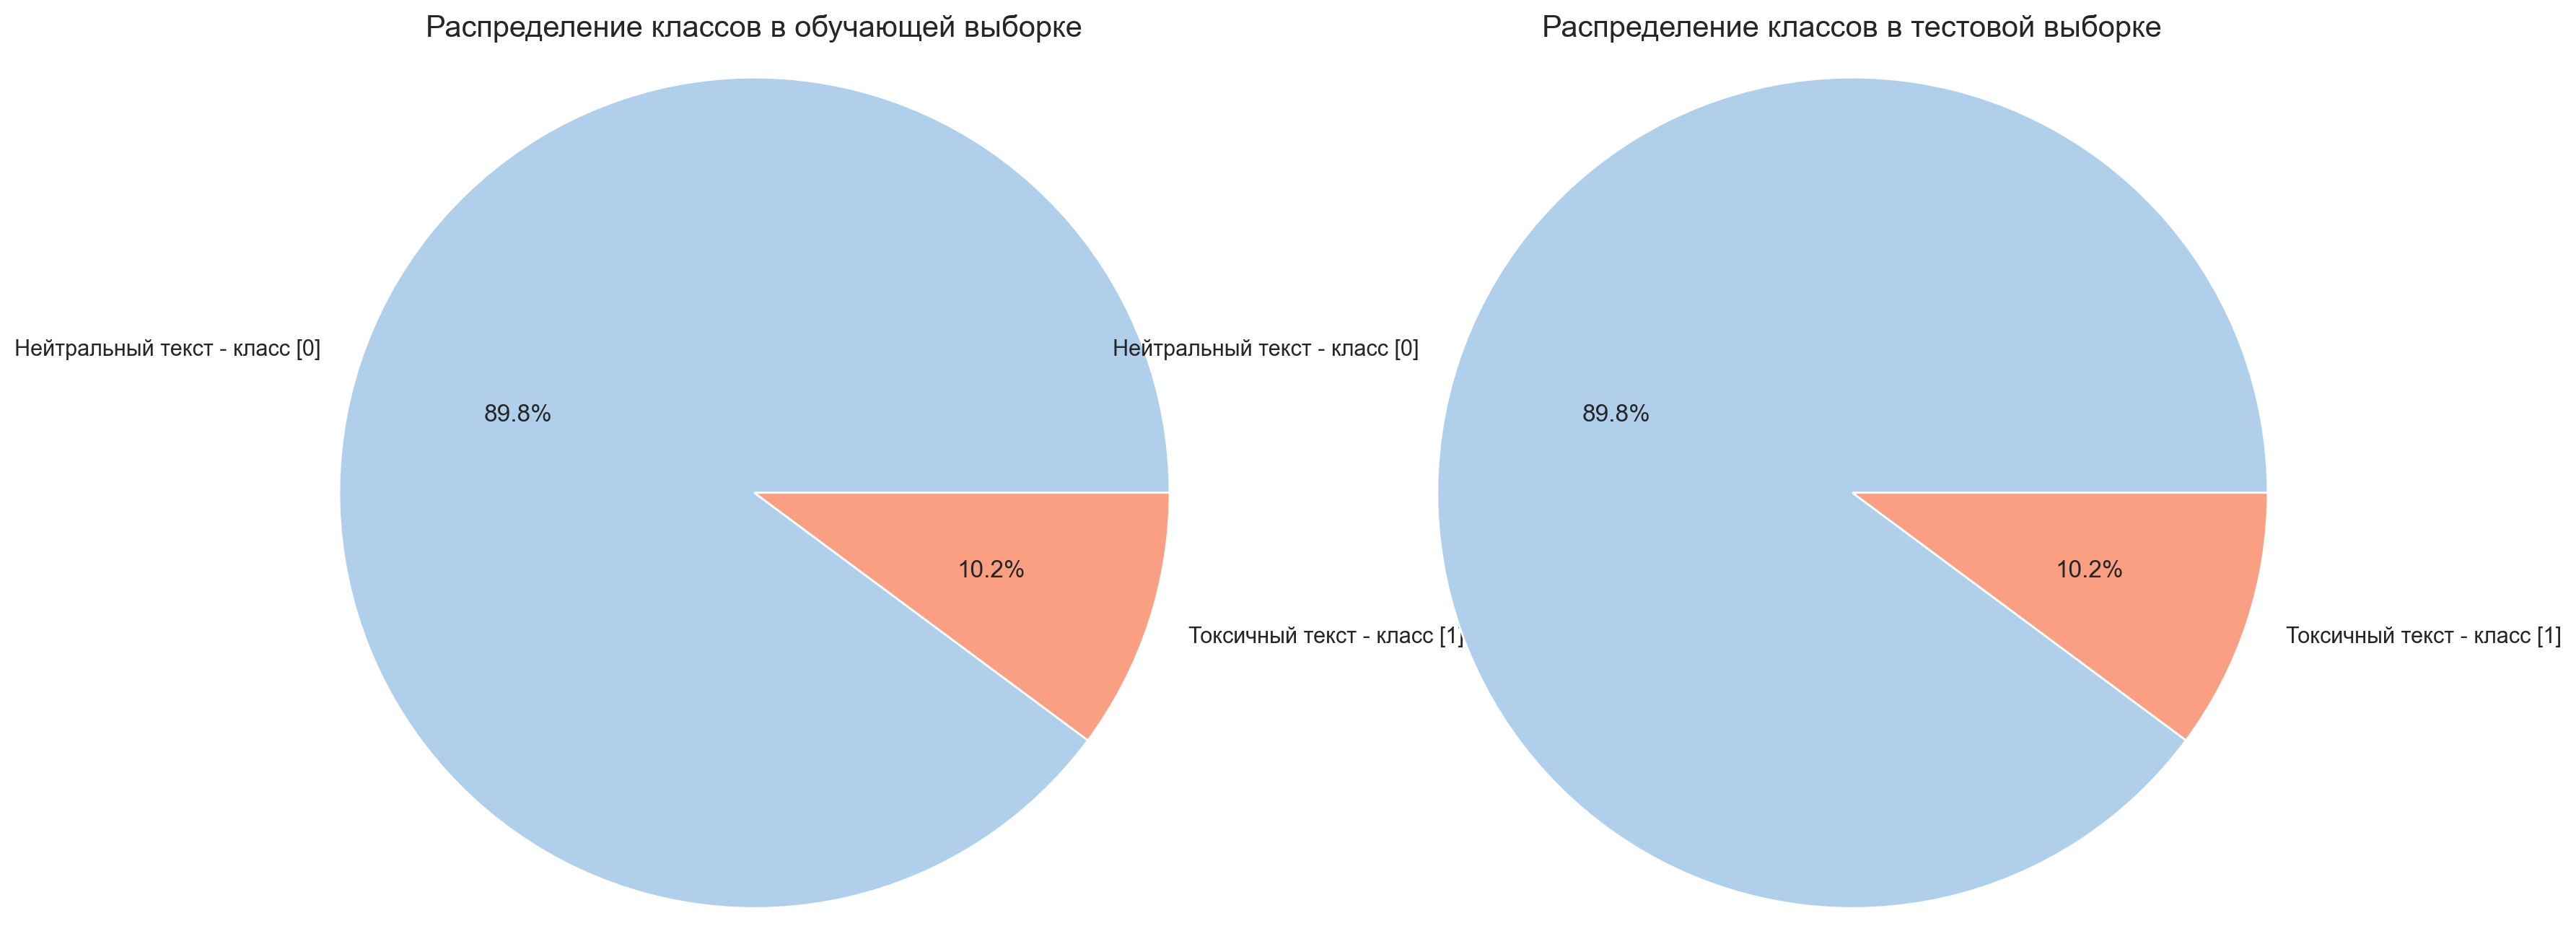

In [17]:
# посмотрим на баланс классов в обучающей и тестовой выборке
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.pie(
    target_train.value_counts(normalize=True), 
    labels=['Нейтральный текст - класс [0]','Токсичный текст - класс [1]'], 
    autopct='%1.1f%%', 
    colors = ['#AFCFEA', '#FB9F82'])
plt.title('Распределение классов в обучающей выборке', fontsize=15)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(
    target_test.value_counts(normalize=True), 
    labels=['Нейтральный текст - класс [0]','Токсичный текст - класс [1]'], 
    autopct='%1.1f%%', 
    colors = ['#AFCFEA', '#FB9F82'])
plt.title('Распределение классов в тестовой выборке', fontsize=15)
plt.axis('equal')

plt.show()

**Вывод:**

Данные были разделены на обучающую и тестовую выборку в отношении 3:1.

### 2.3 TF-IDF

Используем технологию TF-IDF для обработки наших данных. Оценка важности слова определяется величиной TF-IDF. То есть TF отвечает за количество упоминаний слова в отдельном тексте, а IDF отражает частоту его употребления во всём корпусе.

In [18]:
# список текстов для обучения
corpus_train = features_train['text'].values
corpus_train.shape

(119469,)

In [19]:
# инициализируем векторайзер с параметрами и преобразуем тексты в матрицу TF-IDF
vectorizer = TfidfVectorizer(stop_words='english') 
tfidf_train = vectorizer.fit_transform(corpus_train) 
tfidf_train.shape

(119469, 132093)

In [20]:
# список текстов для тестовой выборки
corpus_test = features_test['text'].values
corpus_test.shape

(39823,)

In [21]:
# инициализируем векторайзер с параметрами и преобразуем тексты в матрицу TF-IDF
tfidf_test = vectorizer.transform(corpus_test)
tfidf_test.shape

(39823, 132093)

**Вывод:**

Для обучающей и тестовой выборки были созданы матрицы TF-IDF для оценки важности каждого слова.

### Вывод по шагу "Подготовка данных"

1. В данных был обнаружен признак, не несущий ценности для дальнейшего обучения моделей. Признак удалили.


2. Тексты комментариев очищены от ненужных знаков, убраны стоп-слова, проведена лемматизация.


3. Данные были разделены на обучающую и тестовую выборку в отношении 3:1. В данных обрнаружился дисбаланс классов. Для устранения дисбаланса на следующем этапе применим метод взвешивания классов.


4. Для обучающей и тестовой выборки были созданы матрицы TF-IDF для оценки важности каждого слова.


## Шаг 3 - Обучение моделей
[Вернуться к содержанию](#link)

Для обучения будем использовать следующие модели:

1. Логистическая регрессия / Logistic Regression
2. Дерево решений/ Decision Tree Classifier
3. Градиентный бустинг / Cat Boost Classifier

In [22]:
# создадим функцию для построения матрицы ошибок и ROC кривой
def matrix_roc_auc(model, features):
    predictions = model.predict(features)
    matrix = confusion_matrix(target_train, predictions)

    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, fmt=".0f", cmap="Blues_r")
    plt.title('Матрица ошибок', fontsize=14)
    plt.xlabel('Предсказания', fontsize=12)
    plt.ylabel('Ответы', fontsize=12)
    
    plt.subplot(1, 2, 2)
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_train, probabilities_one_valid) 
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.0])
    plt.xlabel("Доля ложноположительных ответов", fontsize=12) 
    plt.ylabel("Доля истинно положительных ответов", fontsize=12)
    plt.title("ROC-кривая", fontsize=14)
    
    plt.show()

In [23]:
# для устранения дисбаланса классов создадим словарь
# где ключи соответствуют классам, а значения - соотношению между числом объектов класса 0 и класса 1.
class_ratio = data['toxic'].value_counts()[0] / data['toxic'].value_counts()[1]
dict_classes={0:1, 1:class_ratio}
dict_classes

{0: 1, 1: 8.841344371679229}

### 3.1 Логистическая регрессия / Logistic Regression

- Для перебора различных гиперпараметров Logistic Regression будем использовать Grid Search CV
- Обучим модель с наилучшими параметрами и оценим ее качество с помощью кроссвалидации, используя метрику f1
- Построим матрицу ошибок и ROC-кривую.

In [24]:
model_logreg = LogisticRegression(random_state=RANDOM_STATE)

logreg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'class_weight': [dict_classes],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 250, 500, 1000]
}

gs_logreg = GridSearchCV (
    model_logreg, 
    logreg_params, 
    scoring=['f1', 'roc_auc'], 
    refit='f1',
    cv=3,
    n_jobs=-1
)

gs_logreg.fit(tfidf_train, target_train)
metrics = [f'mean_test_{x}' for x in ['f1', 'roc_auc']]
results = pd.DataFrame(gs_logreg.cv_results_)[metrics].iloc[gs_logreg.best_index_]
f1_logreg = results[0]
roc_auc_logreg = results[1]
best_model_logreg = gs_logreg.best_estimator_

print(f'Среднее значение F1: {round(f1_logreg, 3)}')
print(f'Среднее значение AUC-ROC: {round(roc_auc_logreg, 3)}')
print(f'Лучшие параметры: {gs_logreg.best_params_}')

Среднее значение F1: 0.756
Среднее значение AUC-ROC: 0.963
Лучшие параметры: {'C': 10.0, 'class_weight': {0: 1, 1: 8.841344371679229}, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


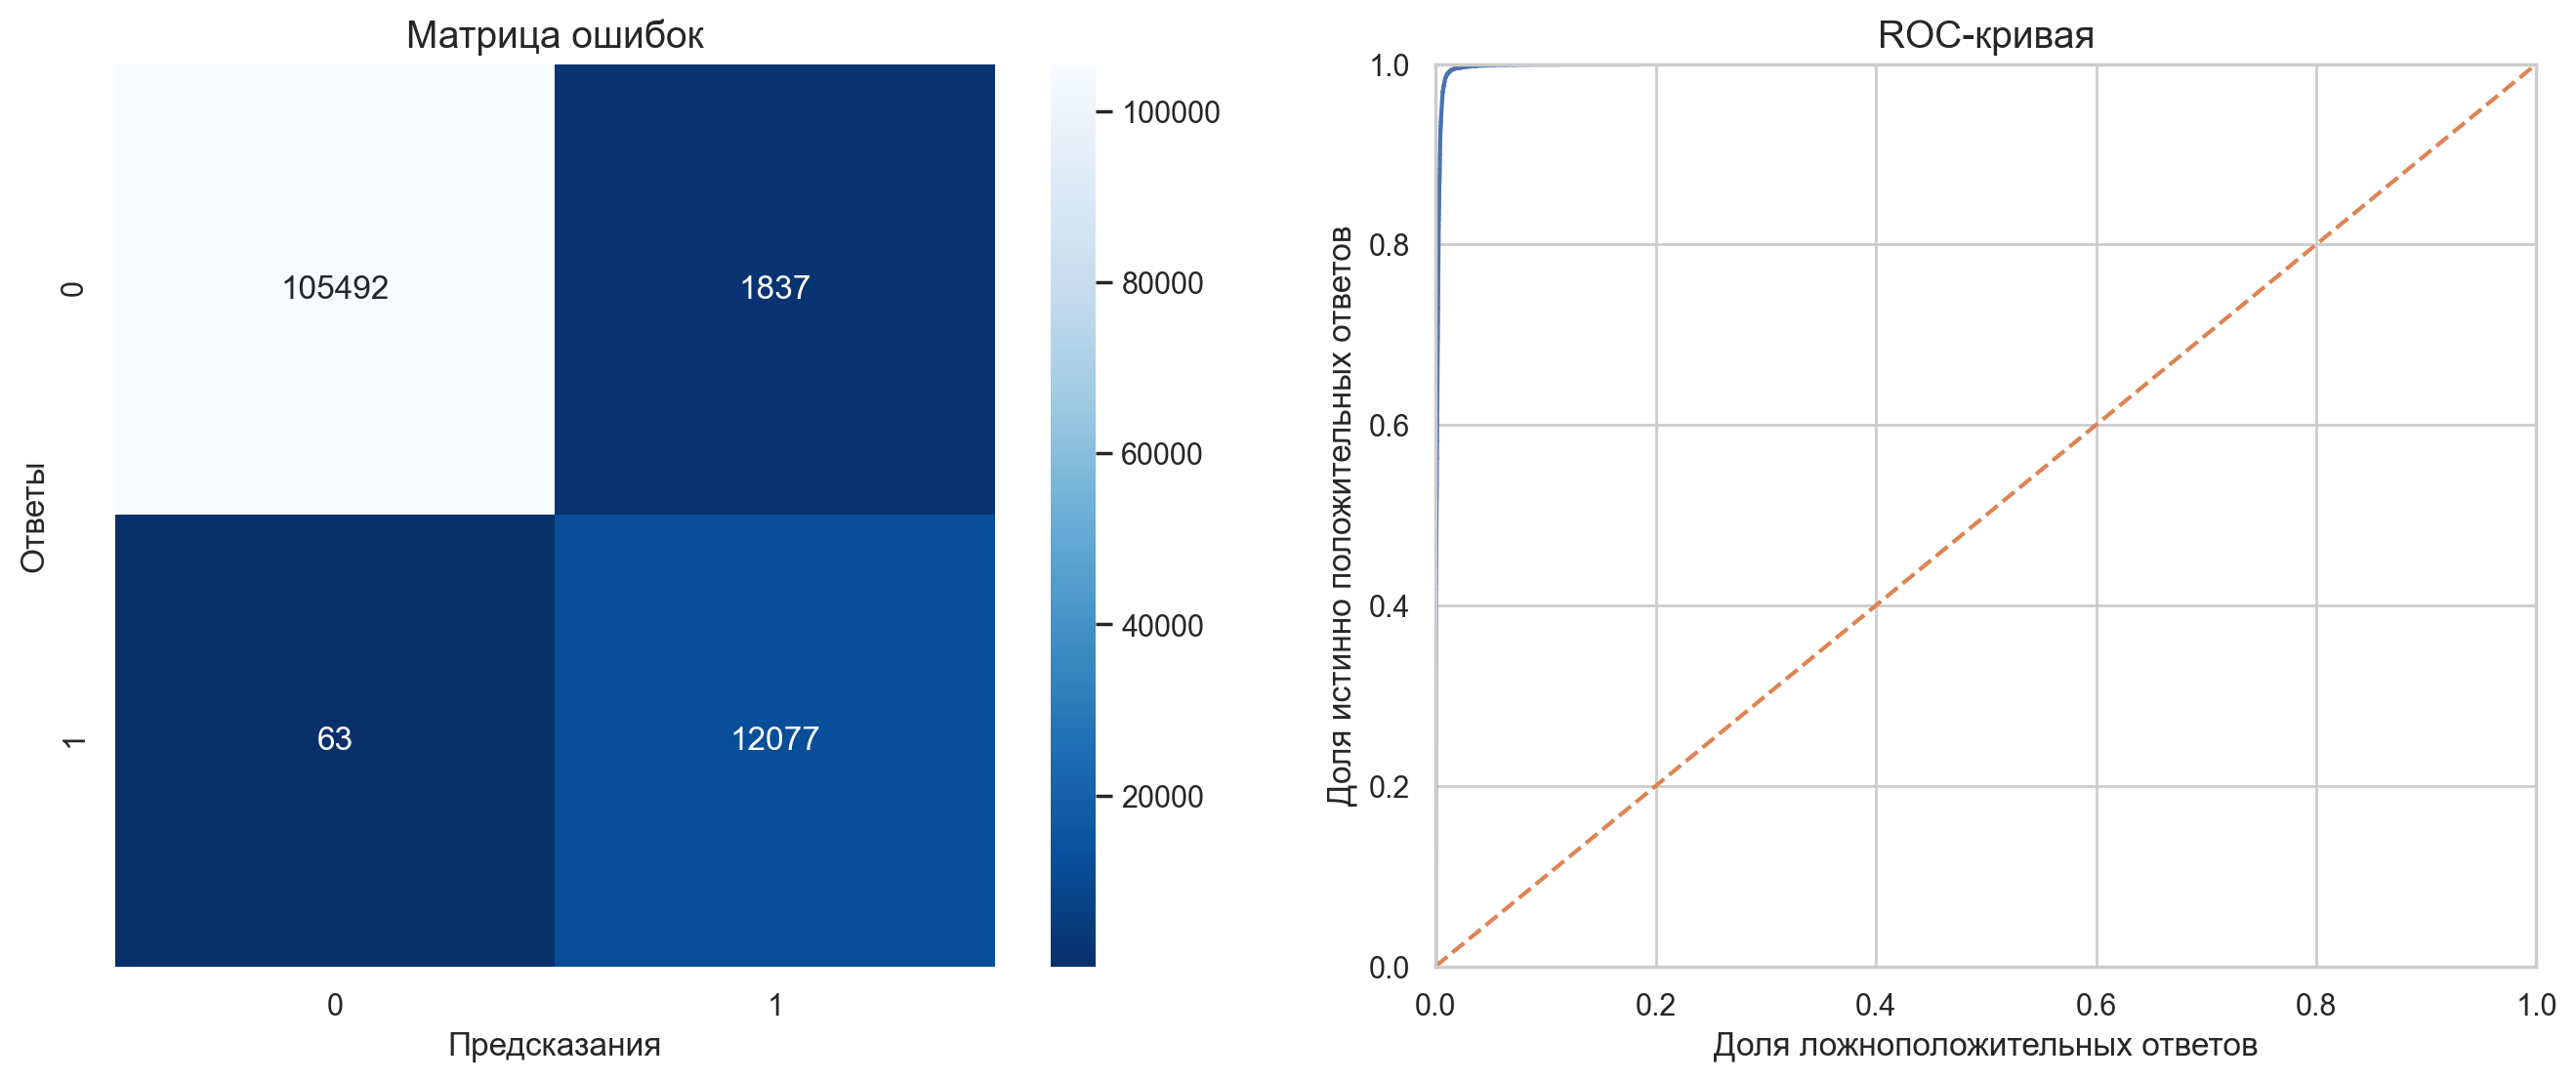

In [25]:
# построим матрицу ошибок и ROC-кривую
matrix_roc_auc(best_model_logreg, tfidf_train)

**Вывод:**

- Наилучшее значение метрики F1 = 0.76 модели логистической регрессии достигается при гиперпараметрах: сила регуляризации - 10,  алгоритм, используемый для оптимизации функции потерь - 'newton-cg' с использованием взвешивания классов в модели. 

- Значение F1 удовлетворяет начальным условиям. Данная модель хорошо распознает отрицательный класс (нейтральный комментарий), но хуже положительный (токсичный комментарий).

### 3.2 Дерево решений/ Decision Tree Classifier

- Для перебора различных гиперпараметров  Decision Tree Classifier будем использовать Grid Search CV
- Обучим модель с наилучшими параметрами и оценим ее качество с помощью кроссвалидации, используя метрику f1
- Построим матрицу ошибок и ROC-кривую.

In [26]:
# переберем различные гиперпараметры Decision Tree Classifier с помощью Grid Search CV. Найдем лучшие
model_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

tree_params = {
    'max_depth': [None] + [i for i in range(2, 7)],
    'class_weight': [dict_classes],
}


gs_tree = GridSearchCV (
    model_tree, 
    tree_params, 
    scoring=['f1', 'roc_auc'], 
    refit='f1',
    cv=3,
    n_jobs=-1
)

gs_tree.fit(tfidf_train, target_train)
metrics = [f'mean_test_{x}' for x in ['f1', 'roc_auc']]
results = pd.DataFrame(gs_tree.cv_results_)[metrics].iloc[gs_tree.best_index_]
f1_tree = results[0]
roc_auc_tree = results[1]
best_model_tree = gs_tree.best_estimator_

print(f'Среднее значение F1: {round(f1_tree, 3)}')
print(f'Среднее значение AUC-ROC: {round(roc_auc_tree, 3)}')
print(f'Лучшие параметры: {gs_tree.best_params_}')

Среднее значение F1: 0.652
Среднее значение AUC-ROC: 0.835
Лучшие параметры: {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': None}


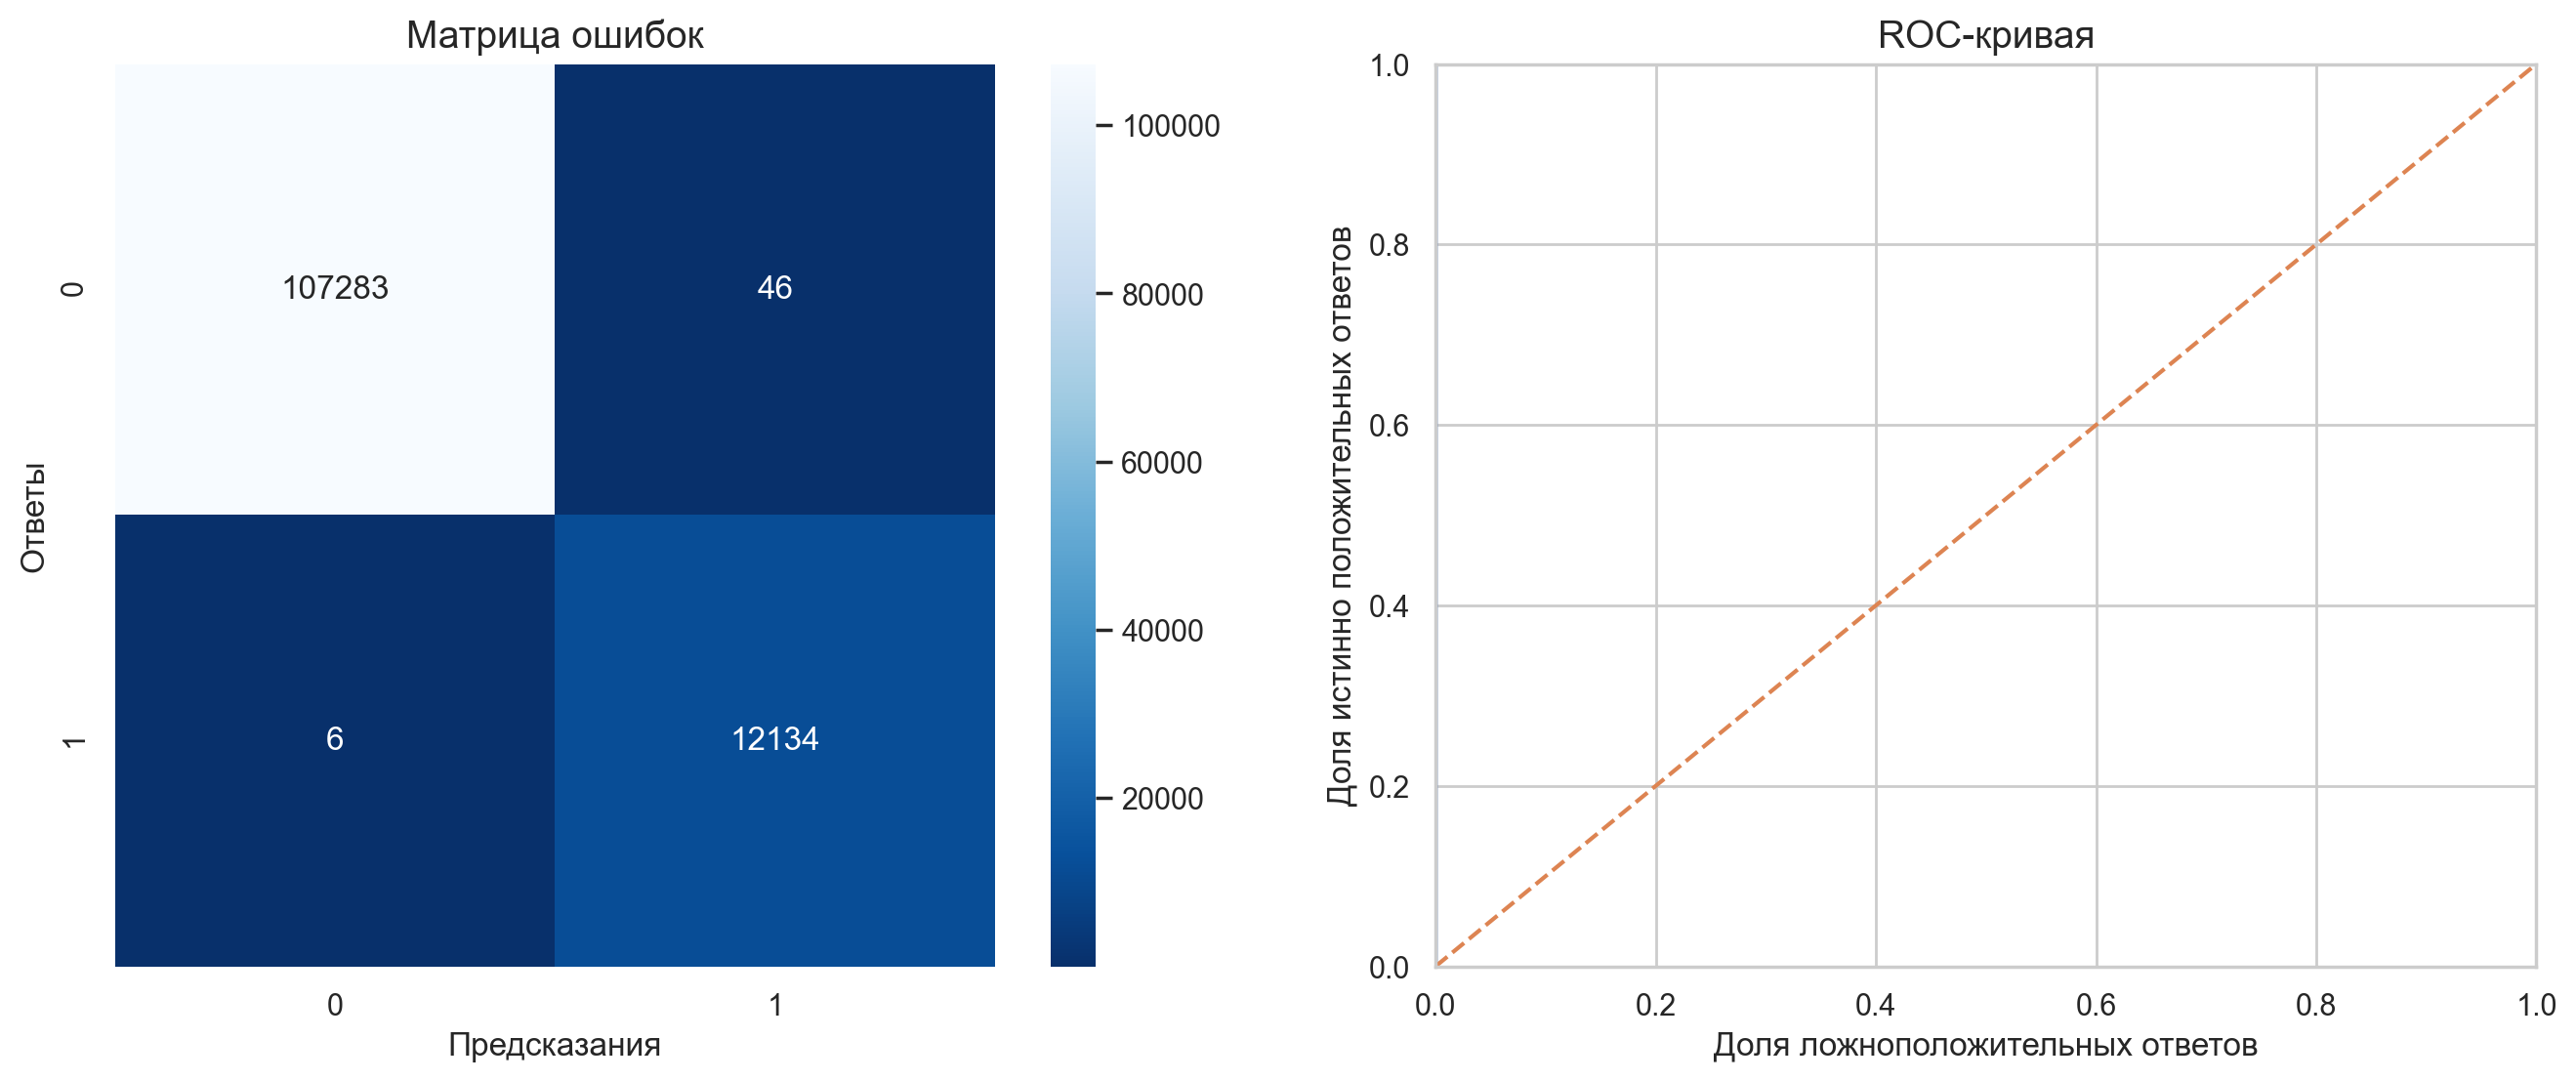

In [27]:
# построим матрицу ошибок и ROC-кривую
matrix_roc_auc(best_model_tree, tfidf_train)

**Вывод:**

- Наилучшее значение метрики F1 = 0.65 модели дерева решений достигается при глубине дерева - None с использованием взвешивания классов в модели. 

- Значение F1 не удовлетворяет начальным условиям задачи. Данная модель хуже распознает отрицательный класс (нейтральный комментарий), но лучше положительный (токсичный комментарий) по сравнению с предыдущей моделью.

### 3.3 Градиентный бустинг / Cat Boost Classifier

- Для перебора различных гиперпараметров Cat Boost Classifier будем использовать Grid Search CV
- Обучим модель с наилучшими параметрами и оценим ее качество с помощью кроссвалидации, используя метрику f1
- Построим матрицу ошибок и ROC-кривую.

In [28]:
# переберем различные гиперпараметры  Cat Boost Classifier с помощью GridSearch CV. Найдем лучшие
model_catboost = CatBoostClassifier(random_state=RANDOM_STATE)

catboost_params = {
    'learning_rate': [.1, .01], 
    'depth': [i for i in range(2, 7, 2)],
    'iterations': [500, 1000, 1500],
    'class_weights': [dict_classes],
    'verbose':[False],
}

gs_catboost = GridSearchCV (
    model_catboost, 
    catboost_params, 
    scoring=['f1', 'roc_auc'], 
    refit='f1',
    cv=2,
    n_jobs=-1
)

gs_catboost.fit(tfidf_train, target_train)
metrics = [f'mean_test_{x}' for x in ['f1', 'roc_auc']]
results = pd.DataFrame(gs_catboost.cv_results_)[metrics].iloc[gs_catboost.best_index_]
f1_catboost = results[0]
roc_auc_catboost = results[1]
best_model_catboost = gs_catboost.best_estimator_

print(f'Среднее значение F1: {round(f1_catboost, 3)}')
print(f'Среднее значение AUC-ROC: {round(roc_auc_catboost, 3)}')
print(f'Лучшие параметры: {gs_catboost.best_params_}')

Среднее значение F1: 0.764
Среднее значение AUC-ROC: 0.96
Лучшие параметры: {'class_weights': {0: 1, 1: 8.841344371679229}, 'depth': 6, 'iterations': 1500, 'learning_rate': 0.1, 'verbose': False}


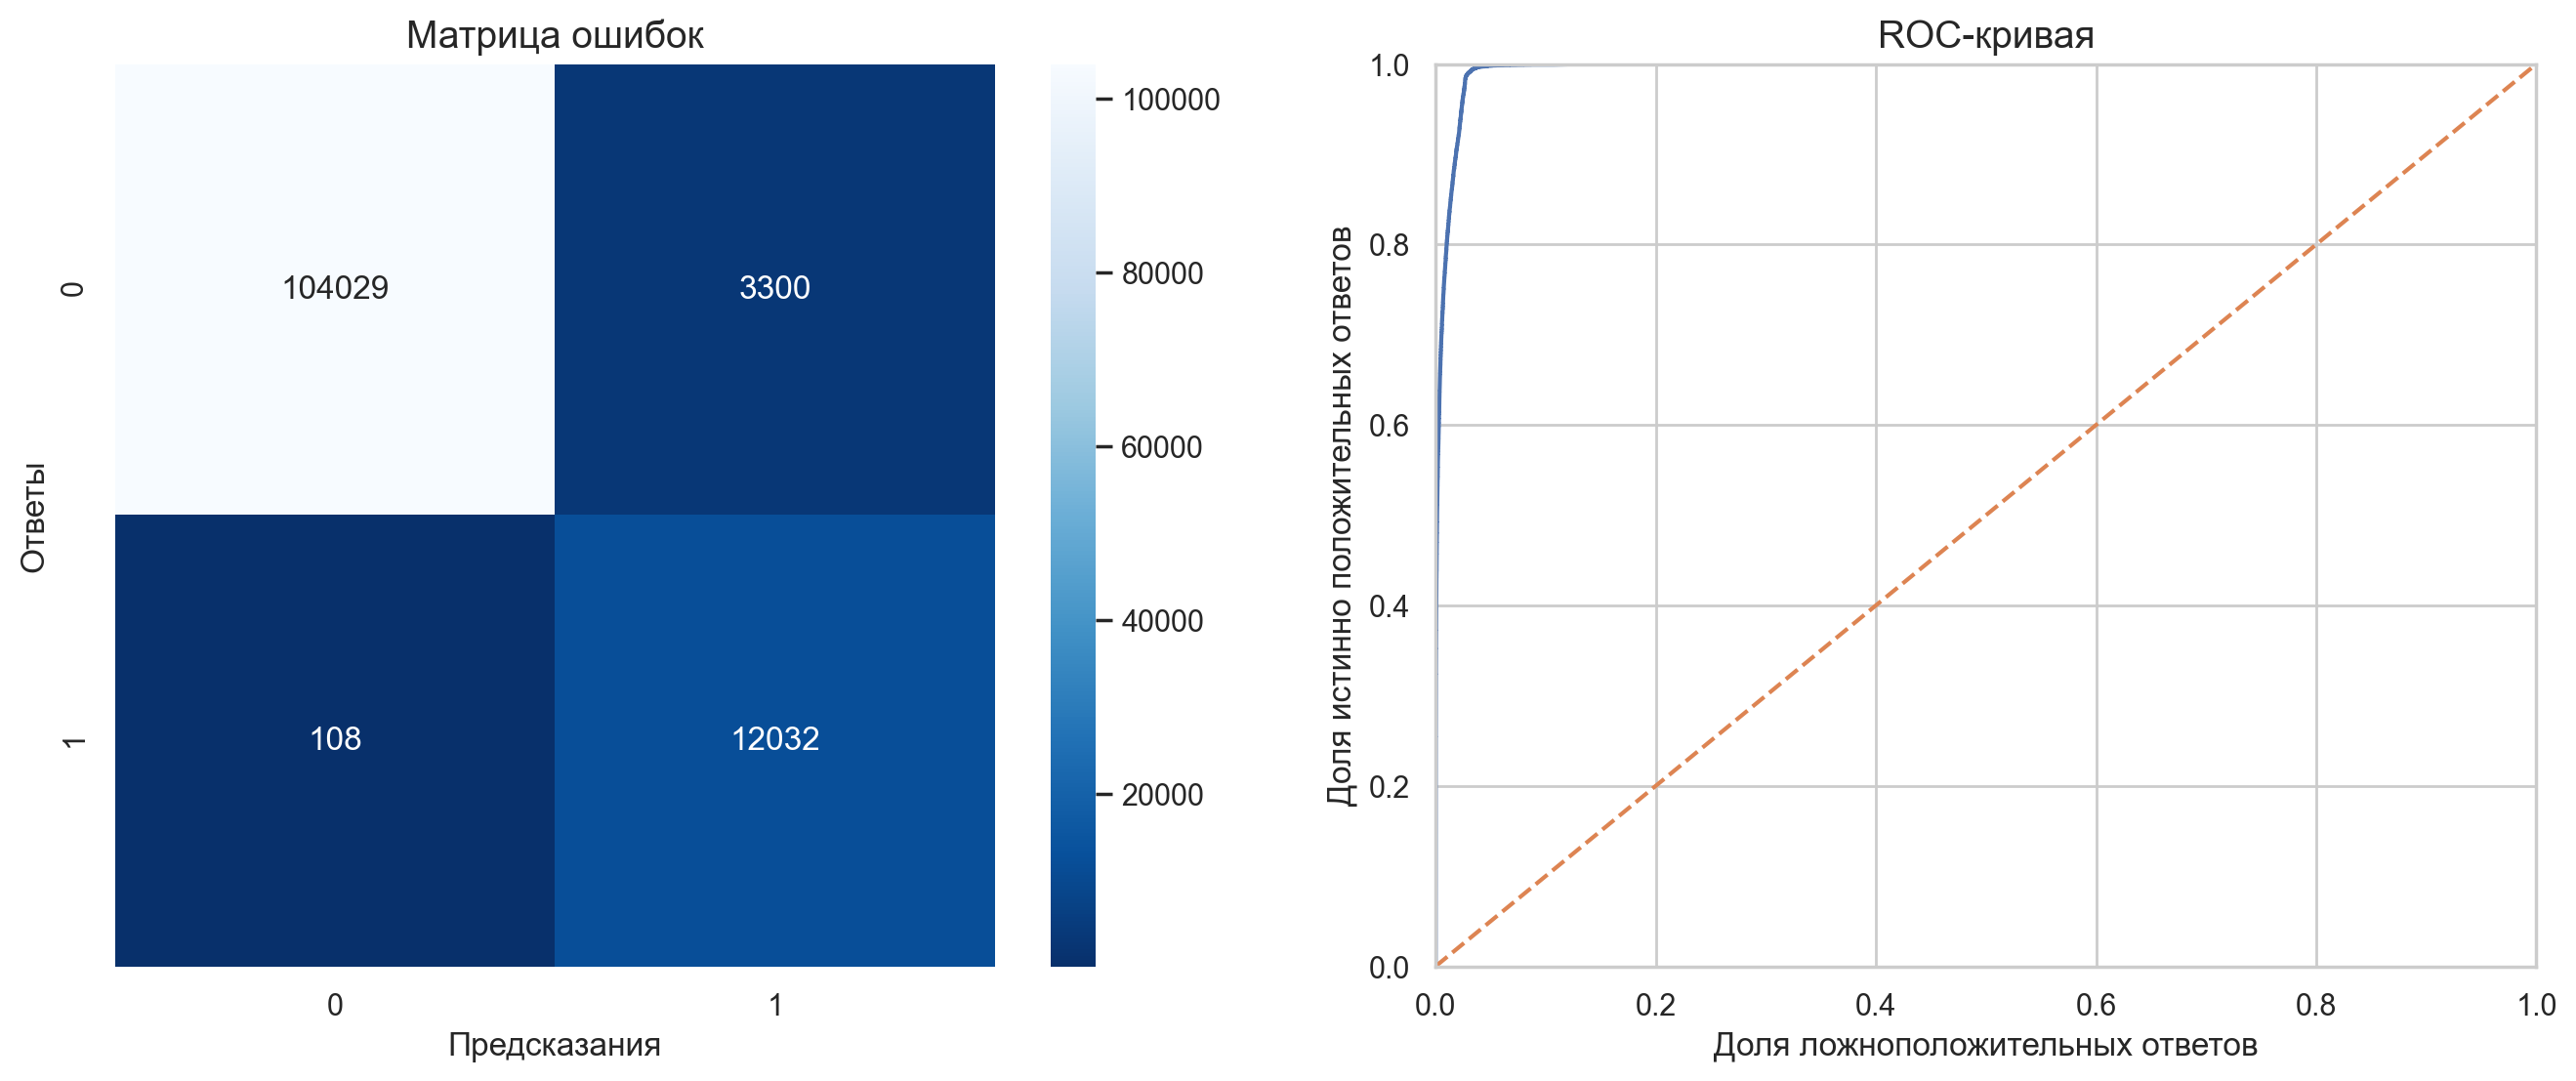

In [29]:
# построим матрицу ошибок и ROC-кривую
matrix_roc_auc(best_model_catboost, tfidf_train)

**Вывод:**

- Наилучшее значение метрики F1 = 0.76 модели градиентного бустинга достигается при параметрах количество итераций = 1500, скорость обучения = 0.1, глубина дерева 6 с использованием взвешивания классов в модели.

### Вывод по шагу "Обучение моделей"

1. На этом шаге обучили три модели: Логистическая регрессия (Logistic Regression), Дерево решений (Decision Tree Classifier) и Градиентный бустинг (Cat Boost Classifier).


2. У каждой модели менялись гиперпараметры, чтобы добиться наиболее высокой оценки качества. На следующем шаге выберем лучшую модель и проверим ее качество на тестовой выборке.

## Шаг 4 - Тестирование лучшей модели
[Вернуться к содержанию](#link)

Опираясь на критерии заказчика, выберем лучшую модель и проверим её качество на тестовой выборке.

In [31]:
# создадим таблицу с показателями f1 и roc-auc для каждой модели
index = ['Logistic Regression',
         'Decision Tree Classifier',
         'Cat Boost Classifier'
        ]

metrics = {'F1':[round(f1_logreg, 3),
                round(f1_tree, 3),
                round(f1_catboost, 3)],
        
        'ROC-AUC':[round(roc_auc_logreg, 3),
                round(roc_auc_tree, 3),
                round(roc_auc_catboost, 3)]}

metrics_data = pd.DataFrame(data=metrics, index=index)
metrics_data

,F1,ROC-AUC
Logistic Regression,0.76,0.96
Decision Tree Classifier,0.65,0.83
Cat Boost Classifier,0.76,0.96


In [33]:
# обучим лучшую модель на тестовой выборке
start_time = time.time()

model = CatBoostClassifier(random_state=RANDOM_STATE, 
                           depth=6, 
                           iterations=1500, 
                           learning_rate=0.1, 
                           class_weights=dict_classes,
                           verbose=False)

model.fit(tfidf_train, target_train)
training_time = time.time() - start_time

print(f'Время обучения модели: {round(training_time, 1)} секунд')

Время обучения модели: 1077.0 секунд


In [35]:
# получим прогнозы и оценим качество
start_time = time.time()

predictions = model.predict(tfidf_test)
probabilities= model.predict_proba(tfidf_test)[:,1]

roc_auc = roc_auc_score(target_test, probabilities)
f1 = f1_score(target_test, predictions)

prediction_time = time.time() - start_time

print('F1-мера на тестовой выборке:', f1)
print('AUC-ROC на тестовой выборке:', roc_auc)
print(f'Время предсказания модели: {round(prediction_time, 1)} секунд')

F1-мера на тестовой выборке: 0.758259284575074
AUC-ROC на тестовой выборке: 0.9636356792766021
Время предсказания модели: 1.2 секунд


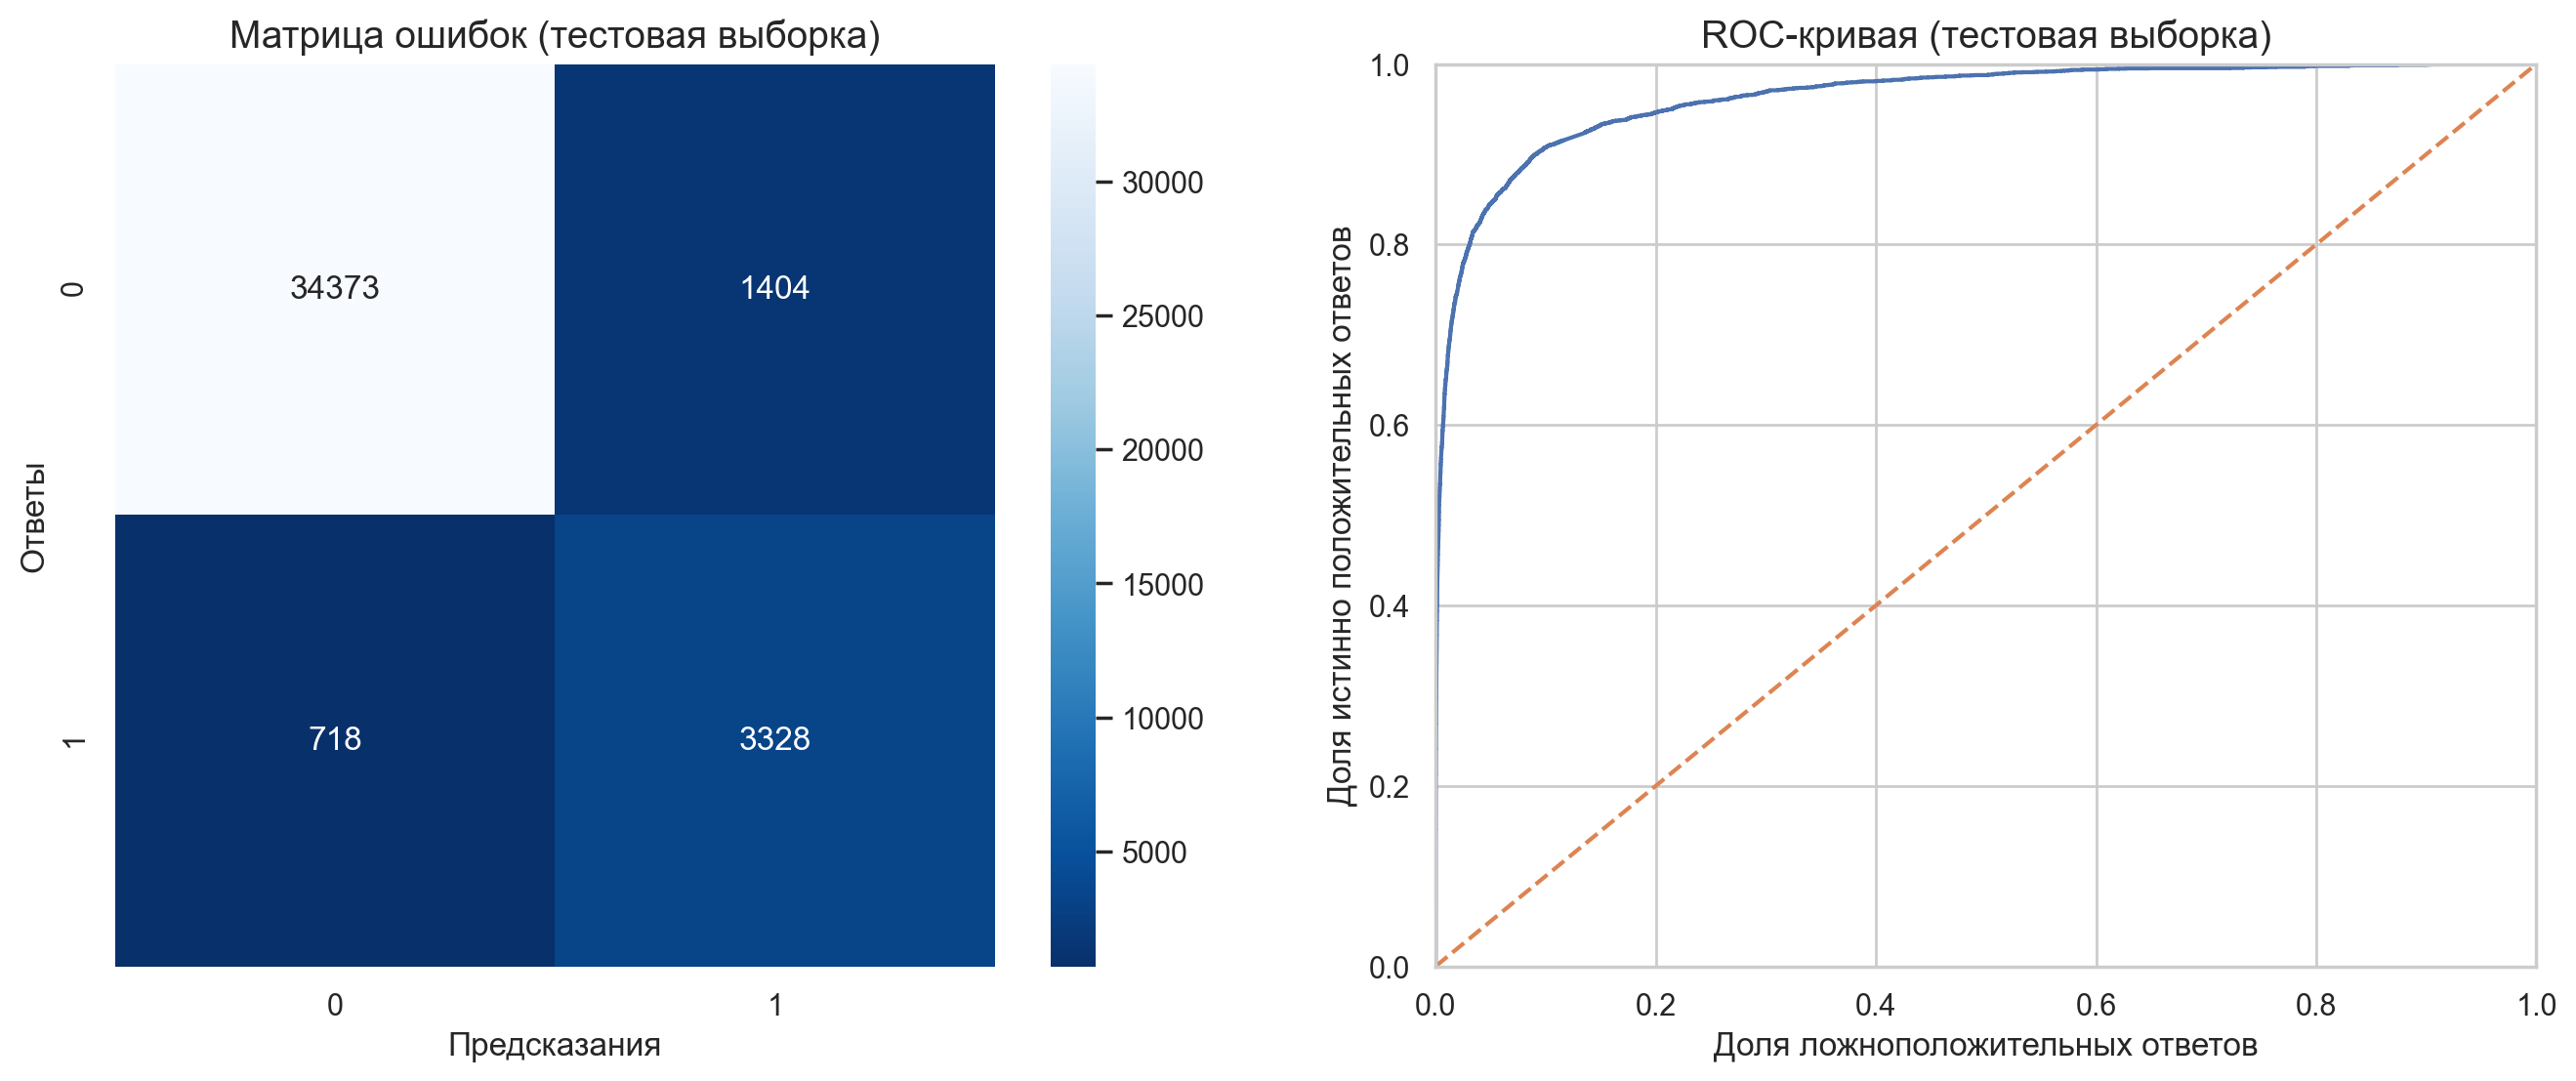

In [36]:
# построим матрицу ошибок и ROC-кривую
matrix = confusion_matrix(target_test, predictions)

plt.figure(figsize=(16, 6))
    
plt.subplot(1, 2, 1)
sns.heatmap(matrix, annot=True, fmt=".0f", cmap="Blues_r")
plt.title('Матрица ошибок (тестовая выборка)', fontsize=14)
plt.xlabel('Предсказания', fontsize=12)
plt.ylabel('Ответы', fontsize=12)

plt.subplot(1, 2, 2)
probabilities_valid = model.predict_proba(tfidf_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.xlabel("Доля ложноположительных ответов", fontsize=12) 
plt.ylabel("Доля истинно положительных ответов", fontsize=12)
plt.title("ROC-кривая (тестовая выборка)", fontsize=14)

plt.show()

### Вывод по шагу "Тестирование лучшей модели"

1. Опираясь на критерии заказчика, итоговой моделью была выбрана модель градиентного бустинга Cat Boost Classifier с использованием метода взвешивания классов для борьбы с дисбалансом.


2. После тестирования модели финальный показатель F1 = 0.76. 

## Шаг 5 - Общий вывод
[Вернуться к содержанию](#link)

Цель настоящего исследования - подготовить прототип модели машинного обучения. Модель должна классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок. Заказчик - интернет-магазин, который запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 


1. В нашем распоряжении были данные по 159292 комментариям. Тексты были написаны на английском языке и содержали лишние знаки и символы. В целевом признаке наблюдался дисбаланс классов (90% объектов принадлежали к 0-му классу).

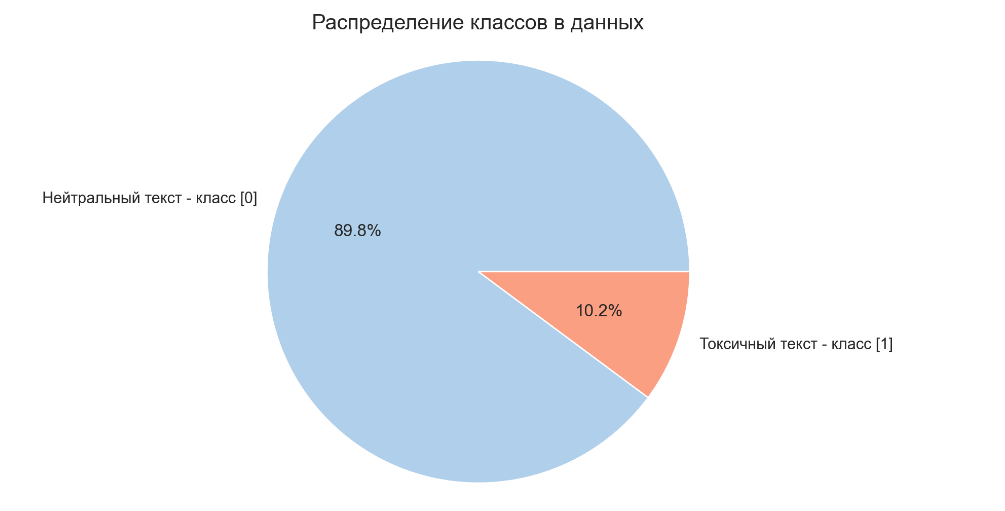

2. Перед началом исследования данные были подготовлены:
    - удален признак, не несущий ценности для дальнейшего обучения модели,
    - тексты комментариев очищены от ненужных знаков, убраны стоп-слова, проведена лемматизация,
    - для устранения дисбаланса было решено применить метод взвешивания классов,
    - для обучающей и тестовой выборки были созданы матрицы TF-IDF для оценки важности каждого слова.   
    
    

3. В обучении модели участвовали три различных алгоритма: Логистическая регрессия (Logistic Regression), Дерево решений (Decision Tree Classifier) и Градиентный бустинг (Cat Boost Classifier). У каждой модели менялись гиперпараметры, чтобы добиться наиболее высокой оценки качества. Оценкой качества модели была выбрана метрика F1 - средневзвешенная мера точности (precision) и полноты (recall) модели.

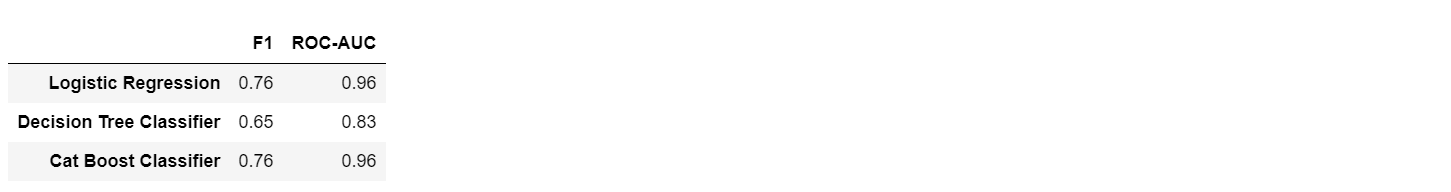

4. По итогам исследования был сделан вывод, что для классификации комментариев на позитивные и негативные наиболее подходящей моделью является модель, построенная на **алгоритме градиентного бусинга (Cat Boost Classifier) с использованием метода взвешивания классов с глубиной дерева = 6, скоростью обучения 0,1 и количеством итераций 1500. Финальное значение метрики F1 = 0.76.

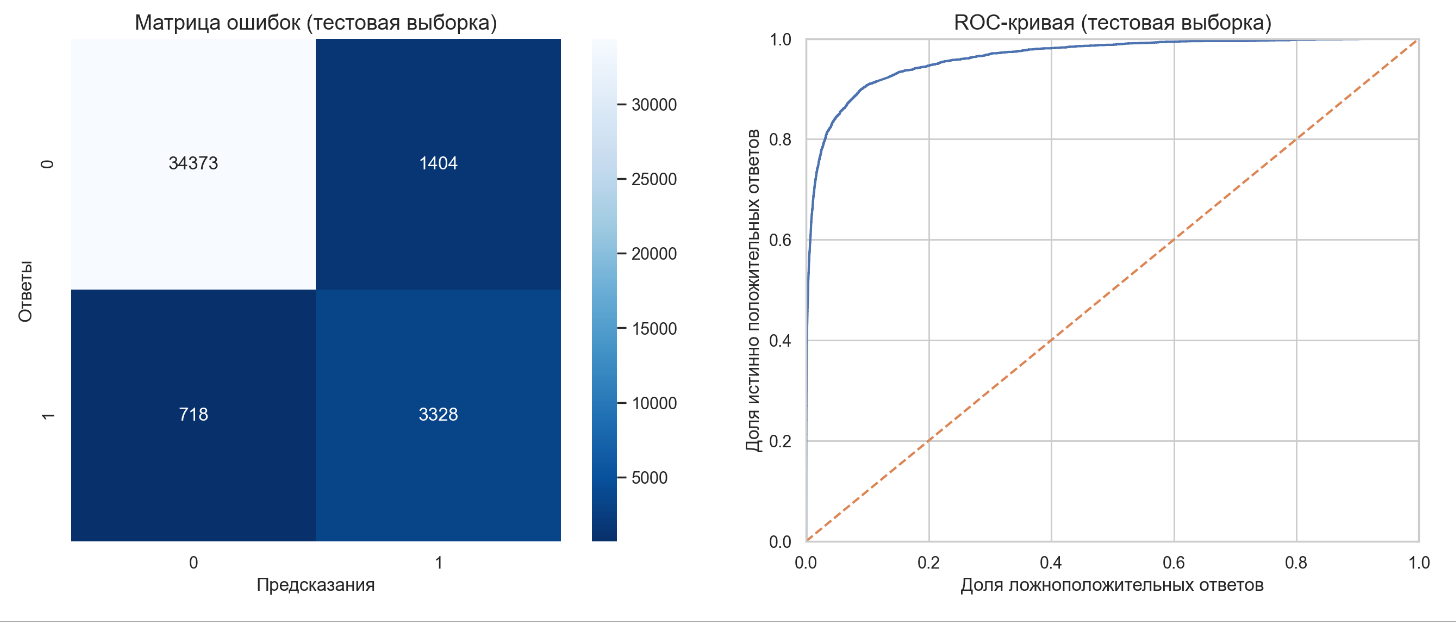